In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data/train.csv', index_col='Id')

In [3]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 80)

<AxesSubplot:>

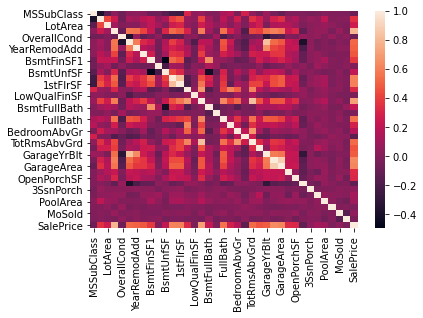

In [6]:
corr = df.corr()
sns.heatmap(corr)

<AxesSubplot:>

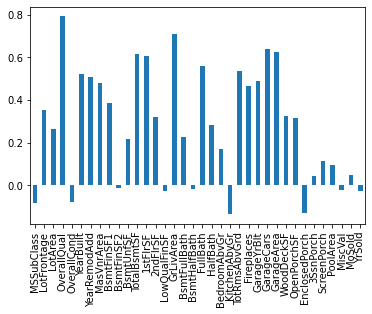

In [7]:
df.drop('SalePrice', axis=1).corrwith(df.SalePrice).plot(kind='bar')

# we can see that there are a lot of correlation 

In [8]:
# find null values and drop columns with null values

has_null = df.isnull().sum()
has_null = has_null[has_null>0]
df.drop(has_null.index, axis=1, inplace=True)

In [9]:
# separate categorical from continuous

cat_val = []
cont_val = []
for col in df.columns:
    # print(f"Unique Values in {col}: {df[col].unique()}")
    # if len(df[col].unique())<=25:
    if object in [df[col].dtype]:
        cat_val.append(col)
    else:
        cont_val.append(col)
print(f"Categorical Columns: {cat_val}")
print(f"Continous Columns: {cont_val}")

Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']
Continous Columns: ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [10]:
from sklearn.metrics import mean_squared_error

def print_score(clf, train_X, train_y, test_X, test_y, train=True):
    if train:
        pred = clf.predict(train_X)
        print("Training Score:")
    else:
        pred = clf.predict(test_X)
        print("Testing Score:")
    print(f"MSE: {mean_squared_error(train_y if train else test_y, pred)}")

In [11]:
# create dummy columns for categorical data:

dataset = pd.get_dummies(df, columns=cat_val)
dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
2,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [12]:
# normalize data
from sklearn.preprocessing import StandardScaler

# do not normalize output
# cont_val.pop()

# train_ssc will be used to unscale the predictions later
train_ssc = StandardScaler()
dataset[cont_val] = train_ssc.fit_transform(dataset[cont_val])

In [13]:
from sklearn.model_selection import train_test_split

X = dataset.drop('SalePrice', axis=1)
y = dataset.SalePrice
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn import svm

svr = svm.SVR()
svr.fit(train_X, train_y)
print_score(svr, train_X, train_y, test_X, test_y, train=True)
print_score(svr, train_X, train_y, test_X, test_y, train=False)

Training Score:
MSE: 0.09061350067559058
Testing Score:
MSE: 0.09450631882801035


In [15]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_X, train_y)
print_score(knr, train_X, train_y, test_X, test_y, train=True)
print_score(knr, train_X, train_y, test_X, test_y, train=False)

Training Score:
MSE: 0.15866897010178851
Testing Score:
MSE: 0.12678370009518


In [16]:
# this one performs atrociously for some reason

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X, train_y)
print_score(lr, train_X, train_y, test_X, test_y, train=True)
print_score(lr, train_X, train_y, test_X, test_y, train=False)

Training Score:
MSE: 0.07633111824006959
Testing Score:
MSE: 1.0528001911696333e+20


In [17]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(train_X, train_y)
print_score(rfr, train_X, train_y, test_X, test_y, train=True)
print_score(rfr, train_X, train_y, test_X, test_y, train=False)

Training Score:
MSE: 0.020423389844105744
Testing Score:
MSE: 0.10751765776573532


In [18]:
# so far the best performaing algorithm is the svm, so we will use that for the predictions:

t_df = pd.read_csv('data/test.csv', index_col='Id')

In [19]:
# we perform the same modifications to the test data:
t_df.drop(has_null.index, axis=1, inplace=True)

In [20]:
t_dataset = pd.get_dummies(t_df, columns=cat_val)

ssc = StandardScaler()
t_dataset[cont_val[:-1]] = ssc.fit_transform(t_dataset[cont_val[:-1]])

t_dataset.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,-0.874711,0.363929,-0.751101,0.400766,-0.340945,-1.072885,0.063273,0.517171,-0.650396,-0.370681,...,0,0,0,1,0,0,0,0,1,0
1462,-0.874711,0.897861,-0.054877,0.400766,-0.439695,-1.214908,1.063027,-0.297800,-0.339262,0.638925,...,0,0,0,1,0,0,0,0,1,0
1463,0.061351,0.809646,-0.751101,-0.497418,0.844059,0.678742,0.772989,-0.297800,-0.954667,-0.266785,...,0,0,0,1,0,0,0,0,1,0
1464,0.061351,0.032064,-0.054877,0.400766,0.876976,0.678742,0.357706,-0.297800,-0.526857,-0.271302,...,0,0,0,1,0,0,0,0,1,0
1465,1.465443,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.387166,-0.297800,1.058554,0.528252,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# there are some leftover null values, they will be replaced with median of the column

for col in t_dataset.columns:
    t_dataset[col].replace(np.NaN, t_dataset[col].mean(), inplace=True)
t_dataset.isnull().sum().sum()
        
for col in train_X.columns:
    if col not in t_dataset.columns:
        t_dataset.insert(loc=train_X.columns.get_loc(col), column=col, value=0)

In [22]:
pred = svr.predict(t_dataset)

In [23]:
predictions = t_dataset
predictions['SalePrice'] = pred

In [24]:
predictions[cont_val] = train_ssc.inverse_transform(predictions[cont_val])

In [25]:
predictions

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1461,19.909167,14148.056880,5.060900,6.021162,1960.973818,1962.723201,472.488538,129.950395,279.950350,894.865251,...,0,0,1,0,0,0,0,1,0,124497.091668
1462,19.909167,19475.543438,6.023446,6.021162,1957.992294,1959.792066,928.318312,-1.475179,417.383153,1337.633328,...,0,0,1,0,0,0,0,1,0,202958.610369
1463,59.491548,18595.350007,5.060900,5.022006,1996.752109,1998.873856,796.077586,-1.475179,145.549153,940.429751,...,0,0,1,0,0,0,0,1,0,197809.703373
1464,59.491548,10836.757106,6.023446,6.021162,1997.745951,1998.873856,606.732911,-1.475179,334.519257,938.448686,...,0,0,1,0,0,0,0,1,0,200134.766056
1465,118.865118,820.276708,7.948538,5.022006,1991.782902,1993.011588,267.114683,-1.475179,1034.820230,1289.097230,...,0,0,1,0,0,0,0,1,0,186071.812638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,158.447498,-5361.219037,4.098355,7.020318,1969.918391,1971.516603,3.635055,-1.475179,558.858097,562.046293,...,0,0,1,0,0,0,0,1,0,95901.963962
2916,158.447498,-5445.814287,4.098355,5.022006,1969.918391,1971.516603,256.094623,-1.475179,304.203197,562.046293,...,0,0,1,1,0,0,0,0,0,80173.738936
2917,19.909167,31022.795021,5.060900,7.020318,1959.979977,1996.919767,1229.867240,-1.475179,7.105814,1233.627404,...,0,0,1,1,0,0,0,0,0,191538.115969


In [26]:
submission = pd.read_csv('data/sample_submission.csv')

In [27]:
for i,j in enumerate(predictions.SalePrice):
    submission.loc[i,'SalePrice'] = j

In [28]:
submission
# done

,Id,SalePrice
0,1461,124497.091668
1,1462,202958.610369
2,1463,197809.703373
3,1464,200134.766056
4,1465,186071.812638
...,...,...
1454,2915,95901.963962
1455,2916,80173.738936
1456,2917,191538.115969
1457,2918,123575.367202


In [29]:
submission.to_csv('submission.csv', index=False)